# Feature Matching (Homography) Brute Force

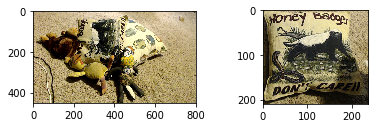

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

i1 = Image.open("matchpic_bag.jpg")
iar1 = np.array(i1)

i2 = Image.open("template_bag.jpg")
iar2 = np.array(i2)

ax1 = plt.subplot2grid((8,6), (0,0), rowspan=4, colspan=3) 
#                      shape  location
# number of rows spanning to the right, columns -> downwards

ax2 = plt.subplot2grid((8,6), (0,4), rowspan=4, colspan=3)

ax1.imshow(iar1)
ax2.imshow(iar2)
plt.show()

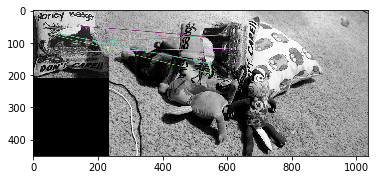

In [5]:
import cv2
img1 = cv2.imread("template_bag.jpg",0)
img2 = cv2.imread("matchpic_bag.jpg",0)

# Detector of similarities
orb = cv2.ORB_create()

# Key points & Descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Find kp12 & des12: BF match object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# match, sort based on distance or "confidence"
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

# Show this!
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)
# change 10 to 30 matches, matches become less accurate (some) -> false positive

plt.imshow(img3)
plt.show()

# MOG Background Reduction

In [6]:
# find changes from previous frame, note that as foreground
# do not change -> background -> get rid of it
import cv2
import numpy as np

cap = cv2.VideoCapture('video.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv2.imshow('original', frame)
    cv2.imshow('foreground', fgmask)
    
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()